# Additions for MatPlotLib

## Calculate Angle between 2 2D vectors and draw Arc symbol Decorator for angles

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
from matplotlib import patches

In [156]:
class DotAnglePatch:
    def __init__(self, vec_a, vec_b):
        '''Uses the dot product to calculate the angle between two vectors in 2D space and draw the arc between
        those vectors in matplotlib'''
        self.vec_a = vec_a
        self.vec_b = vec_b
        self.theta = ''
        
    def get_circle_positions(self):
        x_axis = [10,0]        
        self.theta_vec_a = np.rad2deg(np.arccos(np.dot(self.vec_a, x_axis) / ((LA.norm(self.vec_a))*LA.norm(x_axis))))
        self.theta_vec_b = np.rad2deg(np.arccos(np.dot(self.vec_b, x_axis) / ((LA.norm(self.vec_b))*LA.norm(x_axis))))
        
        if self.vec_a[1] < 0:
            circle_ang_a = 360-self.theta_vec_a
        else:
            circle_ang_a = self.theta_vec_a
            
        if self.vec_b[1] < 0:
            circle_ang_b = 360-self.theta_vec_b
        else:
            circle_ang_b= self.theta_vec_b
        
        self.circle_angs = sorted([circle_ang_a, circle_ang_b], key=float, reverse=True)
        
        
    def get_theta(self):
        self.theta = np.rad2deg(np.arccos(np.dot(self.vec_a, self.vec_b) / ((LA.norm(self.vec_a))*LA.norm(self.vec_b))))
        
        
    def draw_arc(self, arc_radius=10):
        if (self.circle_angs[0] - self.circle_angs[1]) > 180:
            self.arc_start = self.circle_angs[0]
            self.arc_end = self.circle_angs[1]
        else:
            self.arc_start = self.circle_angs[1]
            self.arc_end = self.circle_angs[0]
        
        fig = plt.figure(num=None, figsize=(10,10))
        
        ax = fig.add_subplot(111, aspect='auto')

        e1 = patches.Arc((0, 0), arc_radius*2, arc_radius*2, angle=0, theta1=self.arc_start, theta2=self.arc_end, linewidth=2, 
                         fill=False, zorder=2, label=str(test.theta), color='blue')

        ax.add_patch(e1)
        
        theta_str = self.arc_end - ((self.arc_end - self.arc_start)/2)
        x_coord = arc_radius*(np.cos(np.deg2rad(theta_str)))
        y_coord = arc_radius*(np.sin(np.deg2rad(theta_str)))
        
        print('theta_ang is ', theta_str)
        print('x_coord is ', x_coord)
        print('y_coord is ', y_coord)
        
        ax.text(x_coord, y_coord, str("{0:.2f}".format(round(self.theta,2))) + '$^\circ$')
            

theta_ang is  272.3818208453631
x_coord is  0.4155864383687477
y_coord is  -9.991360663705619


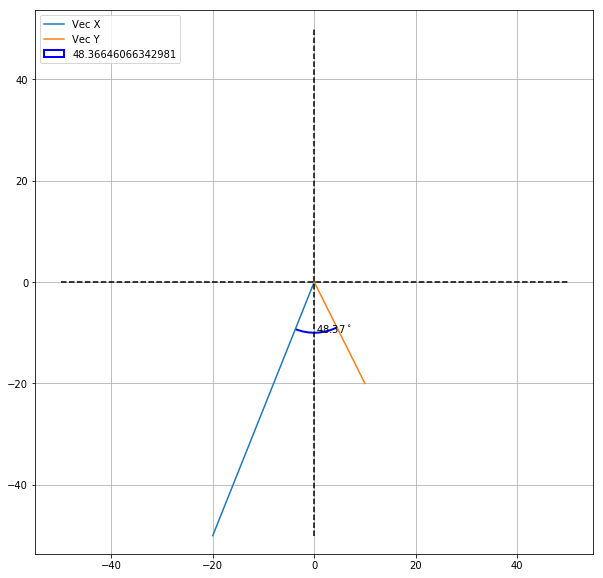

In [164]:
#Example of using DotAnglePatch

vec_2d_x = np.array([-20, -50])
vec_2d_y = np.array([10, -20])

test = DotAnglePatch(vec_2d_x, vec_2d_y)

test.get_circle_positions()
test.get_theta()
test.draw_arc(arc_radius=10)

# plot both vectors as lines
plt.plot([0, vec_2d_x[0]], [0, vec_2d_x[1]], label='Vec X')
plt.plot([0, vec_2d_y[0]], [0, vec_2d_y[1]], label='Vec Y')

#plt.title('Two vectors with a dot product of: '+ str(np.dot(vec_2d_x, vec_2d_y)))
plt.axis('equal')
plt.plot([-50, 50],[0, 0],'k--')
plt.plot([0, 0],[-50, 50],'k--')
plt.grid()

plt.legend(loc="upper left")
# plt_diff = plt.legend((vx, vy, vdiff), ('Vec X', 'Vec Y', 'Vec X - Vec Y'), loc="upper left")
plt.show()